# **Task 1 - Implement a Simple RNN to Predict the Next Value in a Small Sequence of Numbers**

***Read the following descriptions and instructions***

In time-series analysis, predicting future values based on past observations is a fundamental task. Recurrent Neural Networks (RNNs) are particularly well-suited for this type of problem due to their ability to maintain a memory of previous inputs through their recurrent connections.

In this task, you will work with a synthetic dataset that represents a simple sine wave. The sine wave is a periodic function and serves as a good example to understand how RNNs can capture patterns and make predictions.

A **sine wave** is a fundamental waveform that is widely used in various fields, including signal processing, physics, and time-series analysis. It is characterized by its smooth, periodic oscillations, making it an ideal example for understanding time-series prediction tasks.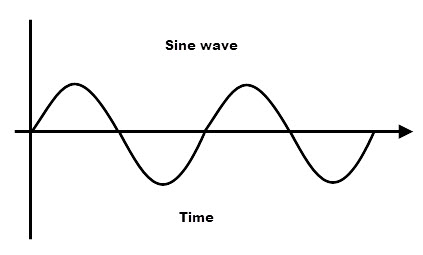

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

The generate_sine_wave function generates a synthetic sine wave dataset, which is often used in time-series prediction tasks, particularly for training models like RNNs and LSTMs.


**seq_length=100**: This parameter is intended to specify the length of the sequence that you want to generate

**num_samples=1000**:This parameter determines the number of data points (samples) to generate for the sine wave.

In [2]:
# 1. Generate a Synthetic Sine Wave Dataset
def generate_sine_wave(seq_length=100, num_samples=1000):
    x = np.linspace(0, 50, num_samples)
    y = np.sin(x)
    return y


The create_dataset function prepares the sine wave data for use in an RNN by converting the continuous data into sequences that the RNN can learn from. The time_step parameter in the create_dataset function represents the number of previous time points (or observations) that are used as input to predict the next time point in a sequence.

In [3]:
# 2. Prepare the Dataset for RNN
def create_dataset(data, time_step=10):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step)])
        y.append(data[i + time_step])
    return np.array(X), np.array(y)

To prepare the data for modeling, it is important to normalize it so that all values fall within a specific range, typically between 0 and 1. This step improves the performance and convergence of neural network models.

The MinMaxScaler from sklearn.preprocessing is used for this purpose. It scales the data such that the minimum value of the data becomes 0 and the maximum value becomes 1.

The sine wave data is reshaped into a 2D array (-1, 1) to fit the scaler, as it expects a 2D input. After scaling, the data is reshaped back into its original 1D form.


In [4]:
# Generate and Normalize the Data
data = generate_sine_wave()
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data.reshape(-1, 1)).reshape(-1)

In [5]:
# Create the Dataset
time_step = 10  # Time steps for RNN input
X, y = create_dataset(data, time_step)

In [6]:
# Reshape for RNN input [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)


This division of data helps in evaluating the model’s performance by training it on a substantial portion of the data and testing its predictions on unseen data.

In [7]:
# Split the Data into Training and Testing Sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


***Modify the units parameter in the SimpleRNN layer to see how the number of hidden units affects the model's ability to learn the sequence.***


**optimizer='adam':** Uses the Adam optimizer, which is a popular choice for training deep learning models due to its adaptive learning rate.


**loss='mean_squared_error':** Sets the loss function to mean squared error (MSE), which is commonly used for regression tasks to measure the average squared difference between predicted and actual values.

In [8]:
# 3. Define the RNN Model
model = Sequential()
model.add(SimpleRNN(units=15, return_sequences=False, input_shape=(time_step, 1)))  # <-- Tune 'units'
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

***Adjust the epochs and batch_size during the training phase to optimize the model's learning process and performance.***

an

**epochs=20:** Specifies the number of times the entire training dataset will pass through the model.


**batch_size=32:** Determines the number of samples per gradient update.

**verbose=1:** Provides detailed output during training, including the progress of each epoch and loss values.

In [9]:
# 4. Train the Model
model.fit(X_train, y_train, epochs=5000, batch_size=32, verbose=1)  # <-- Experiment with 'epochs' and 'batch_size'

Epoch 1/5000
25/25 [==============================] - 3s 14ms/step - loss: 0.0034
Epoch 2/5000
25/25 [==============================] - 0s 11ms/step - loss: 0.0011
Epoch 3/5000
25/25 [==============================] - 0s 7ms/step - loss: 6.8172e-04
Epoch 4/5000
25/25 [==============================] - 0s 7ms/step - loss: 4.3752e-04
Epoch 5/5000
25/25 [==============================] - 0s 6ms/step - loss: 2.8850e-04
Epoch 6/5000
25/25 [==============================] - 0s 8ms/step - loss: 1.9797e-04
Epoch 7/5000
25/25 [==============================] - 0s 5ms/step - loss: 1.4506e-04
Epoch 8/5000
25/25 [==============================] - 0s 6ms/step - loss: 1.2250e-04
Epoch 9/5000
25/25 [==============================] - 0s 6ms/step - loss: 1.0206e-04
Epoch 10/5000
25/25 [==============================] - 0s 10ms/step - loss: 9.2269e-05
Epoch 11/5000
25/25 [==============================] - 0s 8ms/step - loss: 8.8884e-05
Epoch 12/5000
25/25 [==============================] - 0s 9ms/step -

25/25 [==============================] - 0s 5ms/step - loss: 2.7450e-06
Epoch 191/5000
25/25 [==============================] - 0s 5ms/step - loss: 9.2687e-07
Epoch 192/5000
25/25 [==============================] - 0s 6ms/step - loss: 1.0619e-06
Epoch 193/5000
25/25 [==============================] - 0s 5ms/step - loss: 2.2571e-06
Epoch 194/5000
25/25 [==============================] - 0s 6ms/step - loss: 3.2356e-06
Epoch 195/5000
25/25 [==============================] - 0s 5ms/step - loss: 1.0712e-06
Epoch 196/5000
25/25 [==============================] - 0s 5ms/step - loss: 9.7272e-07
Epoch 197/5000
25/25 [==============================] - 0s 4ms/step - loss: 7.3431e-07
Epoch 198/5000
25/25 [==============================] - 0s 5ms/step - loss: 4.4553e-06
Epoch 199/5000
25/25 [==============================] - 0s 5ms/step - loss: 1.1708e-06
Epoch 200/5000
25/25 [==============================] - 0s 4ms/step - loss: 2.3129e-06
Epoch 201/5000
25/25 [==============================] - 0s

25/25 [==============================] - 0s 5ms/step - loss: 3.0003e-07
Epoch 379/5000
25/25 [==============================] - 0s 4ms/step - loss: 3.6846e-07
Epoch 380/5000
25/25 [==============================] - 0s 6ms/step - loss: 8.8343e-07
Epoch 381/5000
25/25 [==============================] - 0s 4ms/step - loss: 5.8322e-07
Epoch 382/5000
25/25 [==============================] - 0s 4ms/step - loss: 8.4672e-07
Epoch 383/5000
25/25 [==============================] - 0s 5ms/step - loss: 1.8547e-06
Epoch 384/5000
25/25 [==============================] - 0s 6ms/step - loss: 2.7943e-06
Epoch 385/5000
25/25 [==============================] - 0s 5ms/step - loss: 5.8634e-07
Epoch 386/5000
25/25 [==============================] - 0s 4ms/step - loss: 4.6615e-07
Epoch 387/5000
25/25 [==============================] - 0s 4ms/step - loss: 4.9903e-07
Epoch 388/5000
25/25 [==============================] - 0s 5ms/step - loss: 4.9318e-07
Epoch 389/5000
25/25 [==============================] - 0s

25/25 [==============================] - 0s 6ms/step - loss: 5.4687e-07
Epoch 567/5000
25/25 [==============================] - 0s 6ms/step - loss: 5.1941e-07
Epoch 568/5000
25/25 [==============================] - 0s 13ms/step - loss: 5.1165e-07
Epoch 569/5000
25/25 [==============================] - 0s 9ms/step - loss: 2.7830e-07
Epoch 570/5000
25/25 [==============================] - 0s 8ms/step - loss: 3.1195e-07
Epoch 571/5000
25/25 [==============================] - 0s 5ms/step - loss: 8.8265e-07
Epoch 572/5000
25/25 [==============================] - 0s 4ms/step - loss: 1.5242e-07
Epoch 573/5000
25/25 [==============================] - 0s 4ms/step - loss: 2.0491e-07
Epoch 574/5000
25/25 [==============================] - 0s 7ms/step - loss: 1.7145e-07
Epoch 575/5000
25/25 [==============================] - 0s 12ms/step - loss: 2.5241e-07
Epoch 576/5000
25/25 [==============================] - 0s 6ms/step - loss: 3.7645e-07
Epoch 577/5000
25/25 [==============================] - 

25/25 [==============================] - 0s 5ms/step - loss: 1.9634e-07
Epoch 755/5000
25/25 [==============================] - 0s 4ms/step - loss: 5.5973e-07
Epoch 756/5000
25/25 [==============================] - 0s 5ms/step - loss: 1.1542e-06
Epoch 757/5000
25/25 [==============================] - 0s 6ms/step - loss: 4.9793e-07
Epoch 758/5000
25/25 [==============================] - 0s 5ms/step - loss: 1.2380e-07
Epoch 759/5000
25/25 [==============================] - 0s 5ms/step - loss: 1.6619e-07
Epoch 760/5000
25/25 [==============================] - 0s 4ms/step - loss: 9.4410e-07
Epoch 761/5000
25/25 [==============================] - 0s 5ms/step - loss: 1.8379e-06
Epoch 762/5000
25/25 [==============================] - 0s 4ms/step - loss: 2.5298e-06
Epoch 763/5000
25/25 [==============================] - 0s 5ms/step - loss: 9.6998e-07
Epoch 764/5000
25/25 [==============================] - 0s 5ms/step - loss: 2.7865e-07
Epoch 765/5000
25/25 [==============================] - 0s

25/25 [==============================] - 0s 4ms/step - loss: 3.6968e-07
Epoch 943/5000
25/25 [==============================] - 0s 4ms/step - loss: 2.3408e-06
Epoch 944/5000
25/25 [==============================] - 0s 5ms/step - loss: 3.9066e-07
Epoch 945/5000
25/25 [==============================] - 0s 4ms/step - loss: 2.7063e-07
Epoch 946/5000
25/25 [==============================] - 0s 5ms/step - loss: 1.7847e-07
Epoch 947/5000
25/25 [==============================] - 0s 4ms/step - loss: 6.4932e-08
Epoch 948/5000
25/25 [==============================] - 0s 4ms/step - loss: 9.5771e-08
Epoch 949/5000
25/25 [==============================] - 0s 4ms/step - loss: 2.6176e-07
Epoch 950/5000
25/25 [==============================] - 0s 4ms/step - loss: 3.7535e-07
Epoch 951/5000
25/25 [==============================] - 0s 4ms/step - loss: 3.7423e-06
Epoch 952/5000
25/25 [==============================] - 0s 5ms/step - loss: 9.8973e-07
Epoch 953/5000
25/25 [==============================] - 0s

25/25 [==============================] - 0s 5ms/step - loss: 5.7582e-08
Epoch 1129/5000
25/25 [==============================] - 0s 4ms/step - loss: 7.1123e-08
Epoch 1130/5000
25/25 [==============================] - 0s 4ms/step - loss: 6.6539e-08
Epoch 1131/5000
25/25 [==============================] - 0s 4ms/step - loss: 2.1228e-07
Epoch 1132/5000
25/25 [==============================] - 0s 5ms/step - loss: 2.3985e-07
Epoch 1133/5000
25/25 [==============================] - 0s 6ms/step - loss: 2.1583e-07
Epoch 1134/5000
25/25 [==============================] - 0s 7ms/step - loss: 5.6626e-08
Epoch 1135/5000
25/25 [==============================] - 0s 10ms/step - loss: 9.1559e-08
Epoch 1136/5000
25/25 [==============================] - 0s 5ms/step - loss: 6.5052e-08
Epoch 1137/5000
25/25 [==============================] - 0s 5ms/step - loss: 4.1334e-08
Epoch 1138/5000
25/25 [==============================] - 0s 5ms/step - loss: 2.8683e-08
Epoch 1139/5000
25/25 [========================

25/25 [==============================] - 0s 5ms/step - loss: 9.6781e-07
Epoch 1315/5000
25/25 [==============================] - 0s 5ms/step - loss: 2.0994e-06
Epoch 1316/5000
25/25 [==============================] - 0s 5ms/step - loss: 2.8480e-06
Epoch 1317/5000
25/25 [==============================] - 0s 5ms/step - loss: 2.2337e-06
Epoch 1318/5000
25/25 [==============================] - 0s 5ms/step - loss: 2.8351e-06
Epoch 1319/5000
25/25 [==============================] - 0s 5ms/step - loss: 3.3093e-07
Epoch 1320/5000
25/25 [==============================] - 0s 5ms/step - loss: 8.5187e-08
Epoch 1321/5000
25/25 [==============================] - 0s 5ms/step - loss: 3.4628e-08
Epoch 1322/5000
25/25 [==============================] - 0s 5ms/step - loss: 2.4066e-08
Epoch 1323/5000
25/25 [==============================] - 0s 4ms/step - loss: 1.3086e-07
Epoch 1324/5000
25/25 [==============================] - 0s 4ms/step - loss: 5.5889e-08
Epoch 1325/5000
25/25 [=========================

25/25 [==============================] - 0s 8ms/step - loss: 2.4532e-06
Epoch 1501/5000
25/25 [==============================] - 0s 6ms/step - loss: 5.1131e-06
Epoch 1502/5000
25/25 [==============================] - 0s 6ms/step - loss: 1.6140e-06
Epoch 1503/5000
25/25 [==============================] - 0s 7ms/step - loss: 1.1115e-07
Epoch 1504/5000
25/25 [==============================] - 0s 6ms/step - loss: 8.8884e-08
Epoch 1505/5000
25/25 [==============================] - 0s 6ms/step - loss: 8.8834e-08
Epoch 1506/5000
25/25 [==============================] - 0s 6ms/step - loss: 1.0511e-07
Epoch 1507/5000
25/25 [==============================] - 0s 6ms/step - loss: 1.8474e-07
Epoch 1508/5000
25/25 [==============================] - 0s 7ms/step - loss: 1.9655e-07
Epoch 1509/5000
25/25 [==============================] - 0s 7ms/step - loss: 9.3748e-08
Epoch 1510/5000
25/25 [==============================] - 0s 7ms/step - loss: 9.1693e-08
Epoch 1511/5000
25/25 [=========================

25/25 [==============================] - 0s 6ms/step - loss: 4.5236e-08
Epoch 1687/5000
25/25 [==============================] - 0s 5ms/step - loss: 8.5920e-08
Epoch 1688/5000
25/25 [==============================] - 0s 5ms/step - loss: 4.4835e-08
Epoch 1689/5000
25/25 [==============================] - 0s 5ms/step - loss: 2.7400e-08
Epoch 1690/5000
25/25 [==============================] - 0s 5ms/step - loss: 1.1516e-07
Epoch 1691/5000
25/25 [==============================] - 0s 5ms/step - loss: 6.2655e-08
Epoch 1692/5000
25/25 [==============================] - 0s 5ms/step - loss: 2.2985e-08
Epoch 1693/5000
25/25 [==============================] - 0s 4ms/step - loss: 2.2212e-08
Epoch 1694/5000
25/25 [==============================] - 0s 5ms/step - loss: 1.6576e-08
Epoch 1695/5000
25/25 [==============================] - 0s 4ms/step - loss: 3.1598e-08
Epoch 1696/5000
25/25 [==============================] - 0s 4ms/step - loss: 1.2559e-08
Epoch 1697/5000
25/25 [=========================

25/25 [==============================] - 0s 4ms/step - loss: 1.0299e-08
Epoch 1873/5000
25/25 [==============================] - 0s 4ms/step - loss: 1.2087e-08
Epoch 1874/5000
25/25 [==============================] - 0s 4ms/step - loss: 1.1564e-08
Epoch 1875/5000
25/25 [==============================] - 0s 4ms/step - loss: 1.7812e-08
Epoch 1876/5000
25/25 [==============================] - 0s 5ms/step - loss: 1.1479e-08
Epoch 1877/5000
25/25 [==============================] - 0s 5ms/step - loss: 8.3550e-09
Epoch 1878/5000
25/25 [==============================] - 0s 5ms/step - loss: 1.2684e-08
Epoch 1879/5000
25/25 [==============================] - 0s 5ms/step - loss: 3.5454e-08
Epoch 1880/5000
25/25 [==============================] - 0s 4ms/step - loss: 1.3513e-08
Epoch 1881/5000
25/25 [==============================] - 0s 5ms/step - loss: 7.6336e-09
Epoch 1882/5000
25/25 [==============================] - 0s 5ms/step - loss: 1.1820e-08
Epoch 1883/5000
25/25 [=========================

25/25 [==============================] - 0s 4ms/step - loss: 9.8312e-08
Epoch 2059/5000
25/25 [==============================] - 0s 4ms/step - loss: 8.8153e-08
Epoch 2060/5000
25/25 [==============================] - 0s 5ms/step - loss: 2.4523e-07
Epoch 2061/5000
25/25 [==============================] - 0s 6ms/step - loss: 3.1267e-08
Epoch 2062/5000
25/25 [==============================] - 0s 8ms/step - loss: 1.4649e-07
Epoch 2063/5000
25/25 [==============================] - 0s 5ms/step - loss: 1.0856e-07
Epoch 2064/5000
25/25 [==============================] - 0s 5ms/step - loss: 1.1110e-07
Epoch 2065/5000
25/25 [==============================] - 0s 5ms/step - loss: 1.6068e-07
Epoch 2066/5000
25/25 [==============================] - 0s 5ms/step - loss: 2.1847e-07
Epoch 2067/5000
25/25 [==============================] - 0s 5ms/step - loss: 2.8437e-07
Epoch 2068/5000
25/25 [==============================] - 0s 5ms/step - loss: 4.9747e-07
Epoch 2069/5000
25/25 [=========================

25/25 [==============================] - 0s 5ms/step - loss: 7.4216e-09
Epoch 2245/5000
25/25 [==============================] - 0s 6ms/step - loss: 1.4087e-08
Epoch 2246/5000
25/25 [==============================] - 0s 4ms/step - loss: 4.2679e-08
Epoch 2247/5000
25/25 [==============================] - 0s 4ms/step - loss: 1.8976e-08
Epoch 2248/5000
25/25 [==============================] - 0s 5ms/step - loss: 1.0120e-07
Epoch 2249/5000
25/25 [==============================] - 0s 9ms/step - loss: 1.7704e-08
Epoch 2250/5000
25/25 [==============================] - 0s 10ms/step - loss: 1.2262e-08
Epoch 2251/5000
25/25 [==============================] - 0s 6ms/step - loss: 1.8315e-08
Epoch 2252/5000
25/25 [==============================] - 0s 6ms/step - loss: 1.8125e-08
Epoch 2253/5000
25/25 [==============================] - 0s 6ms/step - loss: 2.4007e-08
Epoch 2254/5000
25/25 [==============================] - 0s 6ms/step - loss: 2.2379e-08
Epoch 2255/5000
25/25 [========================

25/25 [==============================] - 0s 5ms/step - loss: 1.7572e-08
Epoch 2431/5000
25/25 [==============================] - 0s 5ms/step - loss: 3.0667e-08
Epoch 2432/5000
25/25 [==============================] - 0s 5ms/step - loss: 2.0321e-08
Epoch 2433/5000
25/25 [==============================] - 0s 5ms/step - loss: 7.7285e-08
Epoch 2434/5000
25/25 [==============================] - 0s 6ms/step - loss: 3.5429e-08
Epoch 2435/5000
25/25 [==============================] - 0s 7ms/step - loss: 9.6517e-08
Epoch 2436/5000
25/25 [==============================] - 0s 5ms/step - loss: 8.3308e-08
Epoch 2437/5000
25/25 [==============================] - 0s 5ms/step - loss: 1.1030e-08
Epoch 2438/5000
25/25 [==============================] - 0s 6ms/step - loss: 5.4726e-08
Epoch 2439/5000
25/25 [==============================] - 0s 4ms/step - loss: 5.0760e-08
Epoch 2440/5000
25/25 [==============================] - 0s 4ms/step - loss: 8.2090e-08
Epoch 2441/5000
25/25 [=========================

25/25 [==============================] - 0s 4ms/step - loss: 2.1659e-08
Epoch 2617/5000
25/25 [==============================] - 0s 4ms/step - loss: 1.5453e-08
Epoch 2618/5000
25/25 [==============================] - 0s 4ms/step - loss: 2.6824e-08
Epoch 2619/5000
25/25 [==============================] - 0s 4ms/step - loss: 5.8236e-08
Epoch 2620/5000
25/25 [==============================] - 0s 5ms/step - loss: 1.1885e-07
Epoch 2621/5000
25/25 [==============================] - 0s 8ms/step - loss: 3.4518e-07
Epoch 2622/5000
25/25 [==============================] - 0s 9ms/step - loss: 2.6009e-06
Epoch 2623/5000
25/25 [==============================] - 0s 8ms/step - loss: 4.8183e-06
Epoch 2624/5000
25/25 [==============================] - 0s 6ms/step - loss: 7.3088e-07
Epoch 2625/5000
25/25 [==============================] - 0s 4ms/step - loss: 1.2726e-07
Epoch 2626/5000
25/25 [==============================] - 0s 6ms/step - loss: 3.6959e-08
Epoch 2627/5000
25/25 [=========================

25/25 [==============================] - 0s 8ms/step - loss: 1.0088e-07
Epoch 2803/5000
25/25 [==============================] - 0s 5ms/step - loss: 1.3581e-08
Epoch 2804/5000
25/25 [==============================] - 0s 5ms/step - loss: 7.8293e-09
Epoch 2805/5000
25/25 [==============================] - 0s 5ms/step - loss: 4.7894e-09
Epoch 2806/5000
25/25 [==============================] - 0s 5ms/step - loss: 4.3696e-09
Epoch 2807/5000
25/25 [==============================] - 0s 8ms/step - loss: 1.3489e-08
Epoch 2808/5000
25/25 [==============================] - 0s 6ms/step - loss: 1.8691e-08
Epoch 2809/5000
25/25 [==============================] - 0s 5ms/step - loss: 1.2913e-08
Epoch 2810/5000
25/25 [==============================] - 0s 5ms/step - loss: 9.6068e-09
Epoch 2811/5000
25/25 [==============================] - 0s 5ms/step - loss: 3.4026e-07
Epoch 2812/5000
25/25 [==============================] - 0s 5ms/step - loss: 2.9116e-07
Epoch 2813/5000
25/25 [=========================

25/25 [==============================] - 0s 14ms/step - loss: 2.6828e-07
Epoch 2989/5000
25/25 [==============================] - 0s 12ms/step - loss: 7.2987e-08
Epoch 2990/5000
25/25 [==============================] - 0s 11ms/step - loss: 4.0355e-08
Epoch 2991/5000
25/25 [==============================] - 0s 17ms/step - loss: 1.6722e-08
Epoch 2992/5000
25/25 [==============================] - 0s 8ms/step - loss: 3.2342e-08
Epoch 2993/5000
25/25 [==============================] - 0s 14ms/step - loss: 2.7168e-08
Epoch 2994/5000
25/25 [==============================] - 0s 8ms/step - loss: 4.7476e-08
Epoch 2995/5000
25/25 [==============================] - 0s 7ms/step - loss: 1.1769e-06
Epoch 2996/5000
25/25 [==============================] - 0s 6ms/step - loss: 1.3735e-06
Epoch 2997/5000
25/25 [==============================] - 0s 4ms/step - loss: 1.3897e-06
Epoch 2998/5000
25/25 [==============================] - 0s 4ms/step - loss: 9.0918e-07
Epoch 2999/5000
25/25 [====================

25/25 [==============================] - 0s 5ms/step - loss: 2.2223e-08
Epoch 3082/5000
25/25 [==============================] - 0s 6ms/step - loss: 8.8417e-09
Epoch 3083/5000
25/25 [==============================] - 0s 5ms/step - loss: 1.2662e-08
Epoch 3084/5000
25/25 [==============================] - 0s 5ms/step - loss: 9.0166e-09
Epoch 3085/5000
25/25 [==============================] - 0s 4ms/step - loss: 1.9827e-08
Epoch 3086/5000
25/25 [==============================] - 0s 5ms/step - loss: 8.3104e-09
Epoch 3087/5000
25/25 [==============================] - 0s 5ms/step - loss: 6.6982e-09
Epoch 3088/5000
25/25 [==============================] - 0s 6ms/step - loss: 1.2392e-08
Epoch 3089/5000
25/25 [==============================] - 0s 6ms/step - loss: 1.0535e-08
Epoch 3090/5000
25/25 [==============================] - 0s 5ms/step - loss: 1.4477e-08
Epoch 3091/5000
25/25 [==============================] - 0s 5ms/step - loss: 3.1575e-07
Epoch 3092/5000
25/25 [=========================

25/25 [==============================] - 0s 5ms/step - loss: 5.2350e-08
Epoch 3175/5000
25/25 [==============================] - 0s 5ms/step - loss: 9.0394e-08
Epoch 3176/5000
25/25 [==============================] - 0s 5ms/step - loss: 5.2604e-08
Epoch 3177/5000
25/25 [==============================] - 0s 5ms/step - loss: 1.7178e-06
Epoch 3178/5000
25/25 [==============================] - 0s 5ms/step - loss: 2.1006e-06
Epoch 3179/5000
25/25 [==============================] - 0s 5ms/step - loss: 1.2342e-07
Epoch 3180/5000
25/25 [==============================] - 0s 6ms/step - loss: 5.5963e-08
Epoch 3181/5000
25/25 [==============================] - 0s 5ms/step - loss: 6.0037e-08
Epoch 3182/5000
25/25 [==============================] - 0s 5ms/step - loss: 8.9404e-08
Epoch 3183/5000
25/25 [==============================] - 0s 5ms/step - loss: 3.7019e-08
Epoch 3184/5000
25/25 [==============================] - 0s 5ms/step - loss: 1.2902e-08
Epoch 3185/5000
25/25 [=========================

25/25 [==============================] - 0s 6ms/step - loss: 3.5385e-09
Epoch 3268/5000
25/25 [==============================] - 0s 6ms/step - loss: 1.2408e-08
Epoch 3269/5000
25/25 [==============================] - 0s 8ms/step - loss: 3.8420e-09
Epoch 3270/5000
25/25 [==============================] - 0s 9ms/step - loss: 1.6753e-08
Epoch 3271/5000
25/25 [==============================] - 0s 7ms/step - loss: 1.4533e-08
Epoch 3272/5000
25/25 [==============================] - 0s 7ms/step - loss: 1.6973e-07
Epoch 3273/5000
25/25 [==============================] - 0s 7ms/step - loss: 2.9496e-07
Epoch 3274/5000
25/25 [==============================] - 0s 6ms/step - loss: 1.5642e-07
Epoch 3275/5000
25/25 [==============================] - 0s 7ms/step - loss: 5.1323e-08
Epoch 3276/5000
25/25 [==============================] - 0s 6ms/step - loss: 1.0872e-07
Epoch 3277/5000
25/25 [==============================] - 0s 9ms/step - loss: 2.9796e-08
Epoch 3278/5000
25/25 [=========================

25/25 [==============================] - 0s 3ms/step - loss: 3.6718e-08
Epoch 3454/5000
25/25 [==============================] - 0s 4ms/step - loss: 1.7604e-08
Epoch 3455/5000
25/25 [==============================] - 0s 5ms/step - loss: 2.4433e-08
Epoch 3456/5000
25/25 [==============================] - 0s 4ms/step - loss: 4.7553e-08
Epoch 3457/5000
25/25 [==============================] - 0s 4ms/step - loss: 5.0837e-09
Epoch 3458/5000
25/25 [==============================] - 0s 5ms/step - loss: 9.3586e-09
Epoch 3459/5000
25/25 [==============================] - 0s 6ms/step - loss: 7.0506e-09
Epoch 3460/5000
25/25 [==============================] - 0s 6ms/step - loss: 9.1622e-09
Epoch 3461/5000
25/25 [==============================] - 0s 7ms/step - loss: 6.9653e-09
Epoch 3462/5000
25/25 [==============================] - 0s 8ms/step - loss: 3.7891e-09
Epoch 3463/5000
25/25 [==============================] - 0s 11ms/step - loss: 1.6731e-08
Epoch 3464/5000
25/25 [========================

25/25 [==============================] - 0s 7ms/step - loss: 3.3351e-07
Epoch 3547/5000
25/25 [==============================] - 0s 5ms/step - loss: 1.4196e-07
Epoch 3548/5000
25/25 [==============================] - 0s 6ms/step - loss: 2.1751e-08
Epoch 3549/5000
25/25 [==============================] - 0s 6ms/step - loss: 4.4595e-09
Epoch 3550/5000
25/25 [==============================] - 0s 7ms/step - loss: 6.6513e-09
Epoch 3551/5000
25/25 [==============================] - 0s 7ms/step - loss: 9.6119e-09
Epoch 3552/5000
25/25 [==============================] - 0s 6ms/step - loss: 6.4015e-09
Epoch 3553/5000
25/25 [==============================] - 0s 8ms/step - loss: 5.0319e-08
Epoch 3554/5000
25/25 [==============================] - 0s 6ms/step - loss: 3.9300e-08
Epoch 3555/5000
25/25 [==============================] - 0s 8ms/step - loss: 2.7401e-08
Epoch 3556/5000
25/25 [==============================] - 0s 6ms/step - loss: 1.2838e-08
Epoch 3557/5000
25/25 [=========================

25/25 [==============================] - 0s 6ms/step - loss: 3.2590e-07
Epoch 3640/5000
25/25 [==============================] - 0s 9ms/step - loss: 9.5899e-08
Epoch 3641/5000
25/25 [==============================] - 0s 7ms/step - loss: 2.8066e-08
Epoch 3642/5000
25/25 [==============================] - 0s 6ms/step - loss: 1.4776e-08
Epoch 3643/5000
25/25 [==============================] - 0s 6ms/step - loss: 4.9076e-09
Epoch 3644/5000
25/25 [==============================] - 0s 6ms/step - loss: 2.6181e-08
Epoch 3645/5000
25/25 [==============================] - 0s 6ms/step - loss: 1.7992e-08
Epoch 3646/5000
25/25 [==============================] - 0s 7ms/step - loss: 2.9731e-09
Epoch 3647/5000
25/25 [==============================] - 0s 6ms/step - loss: 7.1128e-09
Epoch 3648/5000
25/25 [==============================] - 0s 6ms/step - loss: 2.1868e-08
Epoch 3649/5000
25/25 [==============================] - 0s 6ms/step - loss: 8.8235e-09
Epoch 3650/5000
25/25 [=========================

25/25 [==============================] - 0s 6ms/step - loss: 4.7672e-09
Epoch 3826/5000
25/25 [==============================] - 0s 5ms/step - loss: 1.1372e-08
Epoch 3827/5000
25/25 [==============================] - 0s 4ms/step - loss: 1.3436e-08
Epoch 3828/5000
25/25 [==============================] - 0s 5ms/step - loss: 8.6227e-09
Epoch 3829/5000
25/25 [==============================] - 0s 6ms/step - loss: 3.3295e-08
Epoch 3830/5000
25/25 [==============================] - 0s 6ms/step - loss: 1.1041e-08
Epoch 3831/5000
25/25 [==============================] - 0s 7ms/step - loss: 1.3314e-08
Epoch 3832/5000
25/25 [==============================] - 0s 6ms/step - loss: 9.2710e-08
Epoch 3833/5000
25/25 [==============================] - 0s 10ms/step - loss: 1.5514e-07
Epoch 3834/5000
25/25 [==============================] - 0s 6ms/step - loss: 1.4422e-07
Epoch 3835/5000
25/25 [==============================] - 0s 6ms/step - loss: 1.5960e-07
Epoch 3836/5000
25/25 [========================

25/25 [==============================] - 0s 9ms/step - loss: 2.4149e-09
Epoch 4012/5000
25/25 [==============================] - 0s 7ms/step - loss: 1.5239e-08
Epoch 4013/5000
25/25 [==============================] - 0s 7ms/step - loss: 7.3969e-09
Epoch 4014/5000
25/25 [==============================] - 0s 7ms/step - loss: 1.6395e-08
Epoch 4015/5000
25/25 [==============================] - 0s 7ms/step - loss: 6.6298e-08
Epoch 4016/5000
25/25 [==============================] - 0s 6ms/step - loss: 2.2218e-06
Epoch 4017/5000
25/25 [==============================] - 0s 6ms/step - loss: 7.5712e-07
Epoch 4018/5000
25/25 [==============================] - 0s 6ms/step - loss: 3.4090e-07
Epoch 4019/5000
25/25 [==============================] - 0s 8ms/step - loss: 1.9287e-07
Epoch 4020/5000
25/25 [==============================] - 0s 5ms/step - loss: 5.6535e-08
Epoch 4021/5000
25/25 [==============================] - 0s 7ms/step - loss: 3.7943e-08
Epoch 4022/5000
25/25 [=========================

25/25 [==============================] - 0s 5ms/step - loss: 1.1519e-06
Epoch 4198/5000
25/25 [==============================] - 0s 5ms/step - loss: 3.3904e-06
Epoch 4199/5000
25/25 [==============================] - 0s 5ms/step - loss: 1.4166e-06
Epoch 4200/5000
25/25 [==============================] - 0s 4ms/step - loss: 4.6536e-07
Epoch 4201/5000
25/25 [==============================] - 0s 4ms/step - loss: 1.0181e-07
Epoch 4202/5000
25/25 [==============================] - 0s 5ms/step - loss: 1.2871e-08
Epoch 4203/5000
25/25 [==============================] - 0s 5ms/step - loss: 4.8184e-09
Epoch 4204/5000
25/25 [==============================] - 0s 5ms/step - loss: 6.7899e-09
Epoch 4205/5000
25/25 [==============================] - 0s 5ms/step - loss: 4.5109e-09
Epoch 4206/5000
25/25 [==============================] - 0s 5ms/step - loss: 2.9745e-09
Epoch 4207/5000
25/25 [==============================] - 0s 4ms/step - loss: 8.5616e-09
Epoch 4208/5000
25/25 [=========================

25/25 [==============================] - 0s 6ms/step - loss: 6.9631e-08
Epoch 4384/5000
25/25 [==============================] - 0s 7ms/step - loss: 1.2860e-07
Epoch 4385/5000
25/25 [==============================] - 0s 7ms/step - loss: 6.8567e-08
Epoch 4386/5000
25/25 [==============================] - 0s 4ms/step - loss: 7.1263e-08
Epoch 4387/5000
25/25 [==============================] - 0s 6ms/step - loss: 1.9394e-06
Epoch 4388/5000
25/25 [==============================] - 0s 5ms/step - loss: 2.3435e-06
Epoch 4389/5000
25/25 [==============================] - 0s 5ms/step - loss: 1.4680e-06
Epoch 4390/5000
25/25 [==============================] - 0s 6ms/step - loss: 2.6305e-07
Epoch 4391/5000
25/25 [==============================] - 0s 5ms/step - loss: 5.4547e-08
Epoch 4392/5000
25/25 [==============================] - 0s 4ms/step - loss: 1.9001e-08
Epoch 4393/5000
25/25 [==============================] - 0s 5ms/step - loss: 1.1386e-08
Epoch 4394/5000
25/25 [=========================

25/25 [==============================] - 0s 5ms/step - loss: 8.0027e-08
Epoch 4477/5000
25/25 [==============================] - 0s 5ms/step - loss: 1.8743e-08
Epoch 4478/5000
25/25 [==============================] - 0s 5ms/step - loss: 3.2669e-08
Epoch 4479/5000
25/25 [==============================] - 0s 5ms/step - loss: 1.3584e-08
Epoch 4480/5000
25/25 [==============================] - 0s 5ms/step - loss: 5.9548e-08
Epoch 4481/5000
25/25 [==============================] - 0s 6ms/step - loss: 2.8546e-07
Epoch 4482/5000
25/25 [==============================] - 0s 5ms/step - loss: 2.3915e-07
Epoch 4483/5000
25/25 [==============================] - 0s 5ms/step - loss: 1.0952e-07
Epoch 4484/5000
25/25 [==============================] - 0s 4ms/step - loss: 6.8181e-07
Epoch 4485/5000
25/25 [==============================] - 0s 4ms/step - loss: 2.3052e-06
Epoch 4486/5000
25/25 [==============================] - 0s 5ms/step - loss: 1.7324e-07
Epoch 4487/5000
25/25 [=========================

25/25 [==============================] - 0s 6ms/step - loss: 5.3377e-09
Epoch 4663/5000
25/25 [==============================] - 0s 7ms/step - loss: 2.6792e-09
Epoch 4664/5000
25/25 [==============================] - 0s 8ms/step - loss: 1.9466e-09
Epoch 4665/5000
25/25 [==============================] - 0s 6ms/step - loss: 5.6311e-09
Epoch 4666/5000
25/25 [==============================] - 0s 6ms/step - loss: 1.0992e-08
Epoch 4667/5000
25/25 [==============================] - 0s 11ms/step - loss: 7.0709e-09
Epoch 4668/5000
25/25 [==============================] - 0s 8ms/step - loss: 2.3865e-09
Epoch 4669/5000
25/25 [==============================] - 0s 15ms/step - loss: 2.6462e-09
Epoch 4670/5000
25/25 [==============================] - 0s 11ms/step - loss: 2.1268e-09
Epoch 4671/5000
25/25 [==============================] - 0s 12ms/step - loss: 2.2086e-09
Epoch 4672/5000
25/25 [==============================] - 0s 9ms/step - loss: 3.6204e-09
Epoch 4673/5000
25/25 [=====================

25/25 [==============================] - 0s 6ms/step - loss: 2.0443e-09
Epoch 4756/5000
25/25 [==============================] - 0s 7ms/step - loss: 4.0462e-09
Epoch 4757/5000
25/25 [==============================] - 0s 7ms/step - loss: 2.8950e-09
Epoch 4758/5000
25/25 [==============================] - 0s 6ms/step - loss: 2.1412e-09
Epoch 4759/5000
25/25 [==============================] - 0s 5ms/step - loss: 4.9240e-09
Epoch 4760/5000
25/25 [==============================] - 0s 7ms/step - loss: 2.7885e-09
Epoch 4761/5000
25/25 [==============================] - 0s 6ms/step - loss: 5.7411e-09
Epoch 4762/5000
25/25 [==============================] - 0s 5ms/step - loss: 2.3465e-09
Epoch 4763/5000
25/25 [==============================] - 0s 6ms/step - loss: 1.7785e-08
Epoch 4764/5000
25/25 [==============================] - 0s 6ms/step - loss: 6.0123e-09
Epoch 4765/5000
25/25 [==============================] - 0s 8ms/step - loss: 3.5528e-09
Epoch 4766/5000
25/25 [=========================

25/25 [==============================] - 0s 6ms/step - loss: 1.4184e-09
Epoch 4942/5000
25/25 [==============================] - 0s 5ms/step - loss: 3.2686e-09
Epoch 4943/5000
25/25 [==============================] - 0s 5ms/step - loss: 1.9392e-09
Epoch 4944/5000
25/25 [==============================] - 0s 6ms/step - loss: 1.2647e-09
Epoch 4945/5000
25/25 [==============================] - 0s 5ms/step - loss: 2.1832e-09
Epoch 4946/5000
25/25 [==============================] - 0s 5ms/step - loss: 3.6032e-09
Epoch 4947/5000
25/25 [==============================] - 0s 6ms/step - loss: 3.1326e-09
Epoch 4948/5000
25/25 [==============================] - 0s 4ms/step - loss: 4.7682e-09
Epoch 4949/5000
25/25 [==============================] - 0s 5ms/step - loss: 8.6191e-09
Epoch 4950/5000
25/25 [==============================] - 0s 5ms/step - loss: 7.5069e-09
Epoch 4951/5000
25/25 [==============================] - 0s 5ms/step - loss: 6.9666e-08
Epoch 4952/5000
25/25 [=========================

In [10]:
# 5. Predict on the Test Data
y_pred = model.predict(X_test)

7/7 [==============================] - 0s 5ms/step


These steps reverse the normalization applied earlier to the predictions and actual values. Normalization scales the data to a range, typically [0, 1], which helps with model training but makes the results difficult to interpret directly.
By applying the inverse transformation, you convert the scaled predictions (y_pred) and test values (y_test) back to their original scale, allowing you to evaluate and visualize the model's performance in the context of the original data values.

In [11]:
# Inverse transform to get the original scale (if normalization was applied)
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1)).reshape(-1)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(-1)

This plot visually compares the actual sine wave values (y_test) with the values predicted by the RNN model (y_pred).

By plotting both sets of values on the same graph, you can easily see how well the model's predictions align with the actual data.

This visualization helps in assessing the performance of the RNN model and understanding how accurately it captures the underlying pattern in the time series data.

***Analyze the resulting plot. If the predicted values deviate significantly from the actual values, experiment with different model configurations and training parameters to improve accuracy.***
  
# **Describe your observations. You can add a text cell and type your observations.**

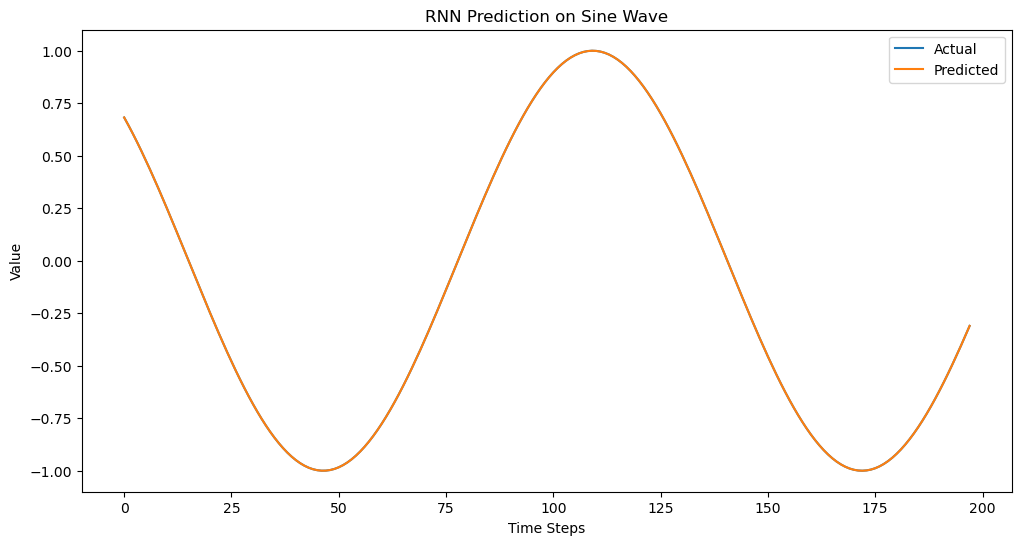

In [12]:

# 6. Plot the Results
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.title('RNN Prediction on Sine Wave')
plt.legend()
plt.show()